<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\jemko\AppData\Local\Temp\ipykernel_7364\1040460066.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

#pd.set_option('display.max_columns', None)
#print(df)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [4]:
#Importation du fichier web.xlsx
df_web = pd.read_excel(r"C:\JN\P6_Optimisez la gestion des données d'une boutique avec R ou Python\Data+Bottleneck\web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel(r"C:\JN\P6_Optimisez la gestion des données d'une boutique avec R ou Python\Data+Bottleneck\erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel(r"C:\JN\P6_Optimisez la gestion des données d'une boutique avec R ou Python\Data+Bottleneck\liaison.xlsx")

C:\Users\jemko\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\jemko\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\jemko\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [6]:
df_erp.head()

product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77

In [7]:
#Consulter le nombre de colonnes 
nombre_colonnes_erp = df_erp.shape[1]
print("Le DataFrame df_erp comporte {} colonne(s)".format(nombre_colonnes_erp))
#La nature des données dans chacune des colonnes
nature_donnees_erp = df_erp.dtypes
print("Nature des données dans chacune des colonnes du DataFrame df_erp :")
print(nature_donnees_erp)
#Le nombre de valeurs présentes dans chacune des colonnes
nb_valeurs_par_colonne_erp = df_erp.count()
print("Nombre de valeurs présentes dans chacune des colonnes du DataFrame df_erp :")
print(nb_valeurs_par_colonne_erp)

Le DataFrame df_erp comporte 6 colonne(s)
Nature des données dans chacune des colonnes du DataFrame df_erp :
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
Nombre de valeurs présentes dans chacune des colonnes du DataFrame df_erp :
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [8]:
#Afficher les 5 premières lignes de la table
# Afficher les 5 premières lignes du DataFrame df_erp
print("Les 5 premières lignes du DataFrame df_erp :")
df_erp.head()

Les 5 premières lignes du DataFrame df_erp :


product_id  onsale_web  price  stock_quantity stock_status  purchase_price
0        3847           1   24.2              16      instock           12.88
1        3849           1   34.3              10      instock           17.54
2        3850           1   20.8               0   outofstock           10.64
3        4032           1   14.1              26      instock            6.92
4        4039           1   46.0               3   outofstock           23.77

In [20]:
# Vérifier s'il y a les lignes en doublons dans la colonne product_id
doublons_product_id_erp = df_erp.duplicated(subset=['product_id'])

# Compter le nombre de doublons
nombre_doublons = doublons_product_id_erp.sum()

# Afficher le nombre de doublons
print(f"Nombre de doublons dans la colonne 'product_id' du DataFrame df_erp : {nombre_doublons}")

Nombre de doublons dans la colonne 'product_id' du DataFrame df_erp : 0


In [21]:
#Afficher les valeurs distinctes de la colonne stock_status
valeurs_distinctes_stock_status_erp = df_erp['stock_status'].unique()
print("Valeurs distinctes de la colonne 'stock_status' du DataFrame df_erp :")
valeurs_distinctes_stock_status_erp
#À quelle(s) autre(s) colonne(s) sont-elles liées ?

Valeurs distinctes de la colonne 'stock_status' du DataFrame df_erp :


array(['instock', 'outofstock'], dtype=object)

In [22]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if pd.isnull(x) or x == 0 else 'instock')

# Affichage des premières lignes du DataFrame pour vérifier
df_erp.head()

product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3   outofstock           23.77   

  stock_status_2  
0        instock  
1        instock  
2     outofstock  
3        instock  
4        instock

In [23]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
resultat_comparaison = df_erp["stock_status"] == df_erp["stock_status_2"]

# Afficher le résultat
print("Les deux colonnes 'stock_status' et 'stock_status_2' sont identiques :", resultat_comparaison)

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

Les deux colonnes 'stock_status' et 'stock_status_2' sont identiques : 0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool


In [24]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

# Effectuer la somme de la comparaison des deux colonnes
somme_comparaison = (df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

# Afficher le résultat
print("Somme de la comparaison des deux colonnes :", somme_comparaison)

Somme de la comparaison des deux colonnes : 821


In [25]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3

# Filtrer les lignes où les colonnes ne sont pas identiques
ecarts = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

# Afficher les lignes où les colonnes ne sont pas identiques
print("Lignes où les colonnes 'stock_status' et 'stock_status_2' ne sont pas identiques :")
ecarts

Lignes où les colonnes 'stock_status' et 'stock_status_2' ne sont pas identiques :


product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
4             23.77        instock  
398            9.66     outofstock  
449            4.96        instock  
573           22.30        instock

In [26]:
#Corriger la ou les données incohérentes

#Verification en utilisant le même code que plus haut pour afficher les problemes

# Mettre à jour les valeurs de la colonne "stock_status_2" pour les rendre cohérentes avec "stock_status"
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], "stock_status_2"] = df_erp["stock_status"]

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [28]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
#print("Nombres d'article avec un prix non renseignés: {}".format()) #Saisir l'instruction manquante dans la fonction format

# Vérifier les prix non renseignés (valeurs NaN)
prix_non_renseignes = df_erp['price'].isnull().sum()
print("Nombre d'articles avec un prix non renseigné : {}".format(prix_non_renseignes))

# Afficher le prix minimum de la colonne "price"
prix_minimum = df_erp['price'].min()
print("Prix minimum dans la colonne 'price' : {}".format(prix_minimum))

# Afficher le prix maximum de la colonne "price"
prix_maximum = df_erp['price'].max()
print("Prix maximum dans la colonne 'price' : {}".format(prix_maximum))

# Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
prix_negatifs_nuls = df_erp[df_erp['price'] <= 0]
print("Articles avec des prix négatifs ou nuls :")
prix_negatifs_nuls

Nombre d'articles avec un prix non renseigné : 0
Prix minimum dans la colonne 'price' : -20.0
Prix maximum dans la colonne 'price' : 225.0
Articles avec des prix négatifs ou nuls :


product_id  onsale_web  price  stock_quantity stock_status  \
151        4233           0  -20.0               0   outofstock   
469        5017           0   -8.0               0   outofstock   
739        6594           0   -9.1              19      instock   

     purchase_price stock_status_2  
151           10.33     outofstock  
469            4.34     outofstock  
739            4.61        instock

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [29]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
quantite_minimum = df_erp['stock_quantity'].min()
print("Quantité minimum dans la colonne 'stock_quantity' : {}".format(quantite_minimum))

#Afficher la quantité maximum de la colonne "stock_quantity"
quantite_maximum = df_erp['stock_quantity'].max()
print("Quantité maximum dans la colonne 'stock_quantity' : {}".format(quantite_maximum))

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stocks_negatifs = df_erp[df_erp['stock_quantity'] < 0]
print("Articles avec des stocks inférieurs à 0 :")
stocks_negatifs

Quantité minimum dans la colonne 'stock_quantity' : -10
Quantité maximum dans la colonne 'stock_quantity' : 145
Articles avec des stocks inférieurs à 0 :


product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [30]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
# Compter les occurrences de chaque valeur dans la colonne "onsale_web"
valeurs_onsale_web = df_erp['onsale_web'].value_counts()

# Afficher les valeurs et leurs occurrences
print("Valeurs et occurrences dans la colonne 'onsale_web' :")
valeurs_onsale_web

Valeurs et occurrences dans la colonne 'onsale_web' :


onsale_web
1    716
0    109
Name: count, dtype: int64

In [31]:
#Quelles sont les colonnes à conserver selon vous?
#-----------------------------------------------------------------

In [32]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".

#df_erp.drop(columns=['stock_status_2'], inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [33]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
# Afficher les prix non renseignés (valeurs NaN) dans la colonne "purchase_price"
prix_non_renseignes_purchase = df_erp['purchase_price'].isnull().sum()
print("Nombre d'articles avec un prix d'achat non renseigné : {}".format(prix_non_renseignes_purchase))

# Afficher le prix minimum de la colonne "purchase_price"
prix_min_purchase = df_erp['purchase_price'].min()
print("Prix d'achat minimum dans la colonne 'purchase_price' : {}".format(prix_min_purchase))

# Afficher le prix maximum de la colonne "purchase_price"
prix_max_purchase = df_erp['purchase_price'].max()
print("Prix d'achat maximum dans la colonne 'purchase_price' : {}".format(prix_max_purchase))

Nombre d'articles avec un prix d'achat non renseigné : 0
Prix d'achat minimum dans la colonne 'purchase_price' : 2.74
Prix d'achat maximum dans la colonne 'purchase_price' : 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [34]:
# Charger le fichier web.xlsx dans un DataFrame
df_web = pd.read_excel(r"C:\JN\\P6_Optimisez la gestion des données d'une boutique avec R ou Python\Data+Bottleneck\web.xlsx")

# Dimension du dataset (nombre d'observations et nombre de caractéristiques)
nombre_observations, nombre_caracteristiques = df_web.shape

# Affichage des dimensions
print("Nombre d'observations dans le fichier web.xlsx : {}".format(nombre_observations))
print("Nombre de caractéristiques dans le fichier web.xlsx : {}".format(nombre_caracteristiques))

Nombre d'observations dans le fichier web.xlsx : 1513
Nombre de caractéristiques dans le fichier web.xlsx : 29


C:\Users\jemko\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [105]:
# Consulter le nombre de colonnes
nombre_colonnes = len(df_web.columns)
print("Nombre de colonnes dans le dataset : {}".format(nombre_colonnes))

# La nature des données dans chacune des colonnes
nature_donnees = df_web.dtypes
print("Nature des données dans chacune des colonnes :")
nature_donnees

Nombre de colonnes dans le dataset : 29
Nature des données dans chacune des colonnes :


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object


In [106]:
# Consulter le nombre de colonnes
nombre_colonnes = len(df_web.columns)
print("Nombre de colonnes dans le dataset : {}".format(nombre_colonnes))

# La nature des données dans chacune des colonnes
nature_donnees = df_web.dtypes
print("Nature des données dans chacune des colonnes :")
nature_donnees

Nombre de colonnes dans le dataset : 29
Nature des données dans chacune des colonnes :


sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object


In [107]:
# Le nombre de valeurs présentes dans chacune des colonnes
valeurs_presentes = df_web.count()
print("Nombre de valeurs présentes dans chacune des colonnes :")
valeurs_presentes

Nombre de valeurs présentes dans chacune des colonnes :


sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
product_type             1429
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64

In [108]:
#Selon vous, quelles sont les colonnes à conserver ?
#product_id          int64
#onsale_web          int64
#price             float64
#stock_quantity      int64
#stock_status       object
#purchase_price    float64

In [109]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
# Liste des colonnes à supprimer
colonnes_a_supprimer = ['post_modified_gmt', 'post_date_gmt']

# Supprimer les colonnes
df_web = df_web.drop(columns=colonnes_a_supprimer)

# Vérifier que les colonnes ont été supprimées
print("Colonnes du DataFrame df_web après suppression des colonnes spécifiées :")
print(df_web.columns)

Colonnes du DataFrame df_web après suppression des colonnes spécifiées :
Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_content', 'product_type', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_content_filtered', 'post_parent',
       'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')


In [110]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?

# Afficher les premières valeurs de la colonne 'sku'
print("Aperçu des premières valeurs de la colonne 'sku' :")
print(df_web['sku'].head())

# Afficher le nombre de valeurs uniques dans la colonne 'sku'
nombre_valeurs_uniques = df_web['sku'].nunique()
print("Nombre de valeurs uniques dans la colonne 'sku' :", nombre_valeurs_uniques)

# Si le nombre de valeurs uniques est élevé, afficher un échantillon aléatoire
if nombre_valeurs_uniques > 20:
    print("Échantillon aléatoire de valeurs de la colonne 'sku' :")
    print(df_web['sku'].sample(20))
else:
    print("Toutes les valeurs de la colonne 'sku' :")
    print(df_web['sku'].unique())

import re

# Définir le motif attendu pour la règle de codification
#motif_attendu = r'^[A-Z]{2}-\d{4}-[A-Z]{2}$'  # Exemple: Deux lettres majuscules, suivi de quatre chiffres, suivi de deux lettres majuscules

# Appliquer la recherche du motif sur la colonne 'sku'
#valeurs_non_conformes = df_web[~df_web['sku'].str.match(motif_attendu, na=False)]

# Afficher les valeurs non conformes
#print("Valeurs ne respectant pas la règle de codification :")
#print(valeurs_non_conformes['sku'])

Aperçu des premières valeurs de la colonne 'sku' :
0    11862
1    16057
2    14692
3    16295
4    15328
Name: sku, dtype: object
Nombre de valeurs uniques dans la colonne 'sku' : 714
Échantillon aléatoire de valeurs de la colonne 'sku' :
1016    11849
1096    16295
1430      523
792     13514
1082    15605
1041    14429
524     12857
434     15667
173     13211
664     16324
707     16077
1028     7818
1166    16330
144     15677
1355    15857
92      14507
338     15710
217     16238
134     15138
837     15583
Name: sku, dtype: object


In [111]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?

In [112]:
#Identifier les lignes sans code articles

In [113]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre

In [35]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?

In [36]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes

#3 - Que constatez-vous?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [116]:
# Charger le fichier liaison.xlsx dans un DataFrame
df_liaison = pd.read_excel(r"C:\JN\P6_Optimisez la gestion des données d'une boutique avec R ou Python\Data+Bottleneck\liaison.xlsx")

# Dimension du dataset (nombre d'observations et nombre de caractéristiques)
nombre_observations, nombre_caracteristiques = df_liaison.shape

# Affichage des dimensions
print("Nombre d'observations dans le fichier liaison.xlsx : {}".format(nombre_observations))
print("Nombre de caractéristiques dans le fichier liaison.xlsx : {}".format(nombre_caracteristiques))

Nombre d'observations dans le fichier liaison.xlsx : 825
Nombre de caractéristiques dans le fichier liaison.xlsx : 2


C:\Users\jemko\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [117]:
# Consulter le nombre de colonnes
nombre_colonnes_web = len(df_liaison.columns)
print("Nombre de colonnes dans le fichier web.xlsx : {}".format(nombre_colonnes_web))

# La nature des données dans chacune des colonnes
nature_donnees_web = df_liaison.dtypes
print("Nature des données dans chacune des colonnes du fichier web.xlsx :")
print(nature_donnees_web)

# Le nombre de valeurs présentes dans chacune des colonnes
valeurs_presentes_web = df_liaison.count()
print("Nombre de valeurs présentes dans chacune des colonnes du fichier web.xlsx :")
print(valeurs_presentes_web)

Nombre de colonnes dans le fichier web.xlsx : 2
Nature des données dans chacune des colonnes du fichier web.xlsx :
id_web        object
product_id     int64
dtype: object
Nombre de valeurs présentes dans chacune des colonnes du fichier web.xlsx :
id_web        734
product_id    825
dtype: int64


In [118]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques ?
valeurs_uniques_product_id = df_liaison['product_id'].nunique()
nombre_observations = df_web.shape[0]

if valeurs_uniques_product_id == nombre_observations:
    print("Toutes les valeurs de la colonne 'product_id' sont uniques.")
else:
    print("Il y a des valeurs répétées dans la colonne 'product_id'.")

Il y a des valeurs répétées dans la colonne 'product_id'.


In [119]:
# Vérifier si les valeurs de la colonne "id_web" sont toutes uniques
valeurs_uniques_id_web = df_liaison['id_web'].nunique()
nombre_observations = df_web.shape[0]

if valeurs_uniques_id_web == nombre_observations:
    print("Toutes les valeurs de la colonne 'id_web' sont uniques.")
else:
    print("Il y a des valeurs répétées dans la colonne 'id_web'.")

Il y a des valeurs répétées dans la colonne 'id_web'.


In [39]:
# Avons-nous des articles sans correspondances?
# Comparer les ensembles de valeurs uniques des colonnes "product_id" et "id_web"
valeurs_uniques_product_id = set(df_liaison['product_id'].unique())
valeurs_uniques_id_web = set(df_liaison['id_web'].unique())

# Vérifier s'il y a des articles sans correspondances
# df_liaison['id_web'].isnull().sum()

if valeurs_uniques_product_id == valeurs_uniques_id_web:
    print("Tous les articles ont des correspondances entre les colonnes 'product_id' et 'id_web'.")
else:
    articles_sans_correspondance = valeurs_uniques_product_id.symmetric_difference(valeurs_uniques_id_web)
    print("Certains articles n'ont pas de correspondance entre les colonnes 'product_id' et 'id_web'.")
    print("Articles sans correspondance : ", len(articles_sans_correspondance))

Certains articles n'ont pas de correspondance entre les colonnes 'product_id' et 'id_web'.
Articles sans correspondance :  1554


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [148]:
# Fusion des fichiers df_erp et df_liaison
# Fusionner les DataFrames df_erp et df_liaison sur une colonne commune, par exemple 'product_id'
df_merged = pd.merge(df_erp, df_liaison, on='product_id', how='inner')

# Afficher les premières lignes du DataFrame fusionné pour vérification
print(df_merged.head())

   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3   outofstock           23.77   

  stock_status_2 id_web  
0        instock  15298  
1        instock  15296  
2     outofstock  15300  
3        instock  19814  
4     outofstock  19815  


In [149]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
# Longueur du DataFrame df_erp avant la fusion
longueur_df_erp = len(df_erp)

# Longueur du DataFrame df_liaison avant la fusion
longueur_df_liaison = len(df_liaison)

# Longueur du DataFrame fusionné df_merged
longueur_df_fusionne = len(df_merged)

# Vérifier s'il y a des lignes ne correspondant pas entre les deux fichiers
if longueur_df_fusionne != longueur_df_erp + longueur_df_liaison:
    print("Il y a des lignes ne correspondant pas entre les deux fichiers.")
    lignes_manquantes = longueur_df_erp + longueur_df_liaison - longueur_df_fusionne
    print("Nombre de lignes ne correspondant pas : ", lignes_manquantes)
else:
    print("Toutes les lignes correspondent entre les deux fichiers.")


Il y a des lignes ne correspondant pas entre les deux fichiers.
Nombre de lignes ne correspondant pas :  825


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [150]:
#Fusionnez les datasets df_merge et df_web
# Fusionner les DataFrames df_merged et df_web sur une colonne commune, par exemple 'id_web'
#df_final = pd.merge(df_merged, df_web, on='id_web', how='inner')

# Afficher les premières lignes du DataFrame fusionné pour vérification
#print(df_final.head())





# Vérifier si la colonne 'id_web' existe dans le DataFrame df_web

# Afficher les noms des colonnes du DataFrame df_web
print("Colonnes du DataFrame df_web :")
print(df_web.columns)

# Afficher les noms des colonnes du DataFrame df_merged
print("\nColonnes du DataFrame df_merged :")
print(df_merged.columns)


# Récupérer les ensembles de noms de colonnes pour chaque DataFrame
#colonnes_df_web = set(df_web.columns)
#colonnes_df_merged = set(df_merged.columns)

# Vérifier s'il y a une intersection entre les ensembles de colonnes
#if colonnes_df_web.intersection(colonnes_df_merged):
    #print("Les DataFrames df_web et df_merged ont au moins une colonne en commun.")
    #print("Colonnes en commun :", colonnes_df_web.intersection(colonnes_df_merged))
#else:
    #print("Les DataFrames df_web et df_merged n'ont pas de colonne en commun.")


Colonnes du DataFrame df_web :
Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_content', 'product_type', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_content_filtered', 'post_parent',
       'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

Colonnes du DataFrame df_merged :
Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'purchase_price', 'stock_status_2', 'id_web'],
      dtype='object')


In [151]:
#Avons-nous des lignes sans correspondances?


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

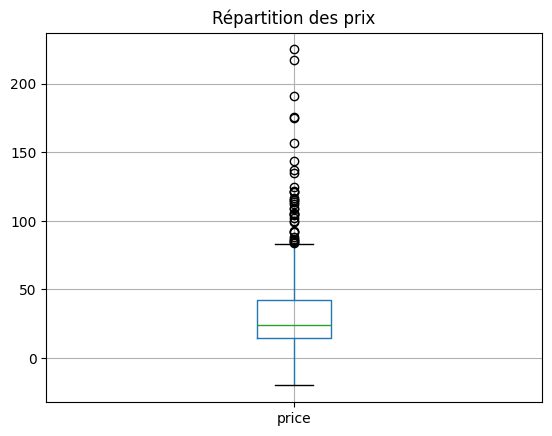

In [153]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas

# Création du boxplot
df_merged.boxplot(column='price')

# Ajout d'un titre
plt.title("Répartition des prix")

# Affichage du boxplot
plt.show()

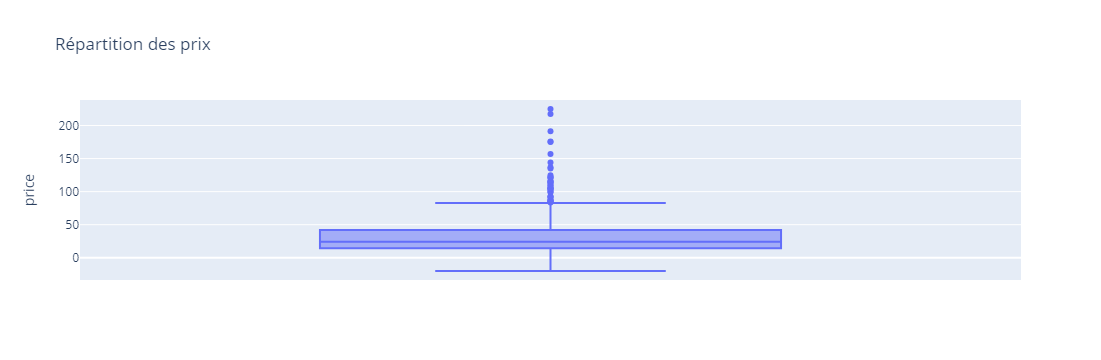

In [154]:
#Autre méthode avec plotly express
# Supposons que df soit votre DataFrame contenant les données, et 'prix' soit la colonne des prix
# Si votre colonne de prix contient des valeurs non numériques, vous devrez la convertir en nombre avant de créer le boxplot

# Exemple de conversion de la colonne 'prix' en float si elle contient des valeurs numériques sous forme de chaînes de caractères
# df['prix'] = df['prix'].astype(float)

# Création du boxplot avec Plotly Express
fig = px.box(df_merged, y='price', title="Répartition des prix")

# Affichage du boxplot
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [156]:
# Calcul de la moyenne du prix
moyenne_prix = df_merged['price'].mean()
print("Moyenne du prix :", moyenne_prix)

# Calcul de l'écart-type du prix
ecart_type_prix = df_merged['price'].std()
print("Écart-type du prix :", ecart_type_prix)

# Calcul du Z-score
# Z-score = (X - mean) / std
# X représente la valeur individuelle, mean est la moyenne et std est l'écart-type
df_merged['Z_score'] = (df_merged['price'] - moyenne_prix) / ecart_type_prix

# Affichage des premières lignes du DataFrame avec le Z-score
print("Premières lignes du DataFrame avec le Z-score :")
df_merged.head()

Moyenne du prix : 32.187696969696965
Écart-type du prix : 26.712076775505277
Premières lignes du DataFrame avec le Z-score :


product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3   outofstock           23.77   

  stock_status_2 id_web   Z_score  
0        instock  15298 -0.299029  
1        instock  15296  0.079077  
2     outofstock  15300 -0.426313  
3        instock  19814 -0.677136  
4     outofstock  19815  0.517081

In [157]:
#Quel est le seuil prix dont z-score est supérieur à 3?
# Seuil Z-score supérieur à 3
seuil_z_score = 3

# Filtrer le DataFrame pour trouver les prix avec un Z-score supérieur à 3
prix_z_score_sup_3 = df_merged[df_merged['Z_score'] > seuil_z_score]['price']

# Afficher les prix correspondants
print("Prix avec un Z-score supérieur à 3 :")
print(prix_z_score_sup_3)

Prix avec un Z-score supérieur à 3 :
208    225.0
227    176.0
230    157.0
242    144.0
411    137.0
460    217.5
556    124.8
598    175.0
635    191.3
651    122.0
652    114.0
697    135.0
703    116.4
708    115.0
709    121.0
711    115.0
712    121.0
Name: price, dtype: float64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [168]:
# Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
mesures_dispersion = df_merged['price'].describe()

# Affichage du résumé statistique des mesures de dispersion
print("Résumé statistique des mesures de dispersion pour la colonne 'price':")
print(mesures_dispersion)

Résumé statistique des mesures de dispersion pour la colonne 'price':
count    825.000000
mean      32.187697
std       26.712077
min      -20.000000
25%       14.500000
50%       24.300000
75%       42.000000
max      225.000000
Name: price, dtype: float64


In [169]:
#Définissez un seuil pour les articles "outliers" en prix
# Calcul des quartiles Q1 et Q3
Q1 = df_merged['price'].quantile(0.25)
Q3 = df_merged['price'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définition des seuils pour les "outliers"
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

# Affichage des seuils pour les "outliers"
print("Seuil inférieur pour les outliers en prix :", seuil_inferieur)
print("Seuil supérieur pour les outliers en prix :", seuil_superieur)

Seuil inférieur pour les outliers en prix : -26.75
Seuil supérieur pour les outliers en prix : 83.25


In [208]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

# Filtrer le DataFrame pour les articles considérés comme des "outliers"
articles_outliers = df_merged[(df_merged['price'] < seuil_inferieur) | (df_merged['price'] > seuil_superieur)]

# Nombre d'articles considérés comme des "outliers"
nombre_articles_outliers = len(articles_outliers)

# Nombre total d'articles dans le catalogue
nombre_total_articles = len(df_merged)

# Calcul de la proportion d'articles "outliers" par rapport à l'ensemble du catalogue
proportion_outliers = nombre_articles_outliers / nombre_total_articles

# Affichage du nombre d'articles "outliers" et de leur proportion
print("Nombre d'articles outliers :", nombre_articles_outliers)
print("Proportion d'articles outliers dans l'ensemble du catalogue :", proportion_outliers)

Nombre d'articles outliers : 36
Proportion d'articles outliers dans l'ensemble du catalogue : 0.04363636363636364


In [209]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA (ERREUR)</h3>
</div>

In [214]:
##############################
# Calculer le CA su site web #
##############################

# Calculer le chiffre d'affaires par article
# Fusionner les DataFrames df_merged et df_web sur les colonnes 'id_web' et 'sku'
merged_df = pd.merge(df_merged, df_web, left_on=['id_web', 'sku'], right_on=['id_web', 'sku'], how='inner')

# Calculer la nouvelle colonne ca_par_article en multipliant price par total_sales
merged_df['ca_par_article'] = merged_df['price'] * merged_df['total_sales']

# Afficher le DataFrame avec la nouvelle colonne
print(merged_df)

KeyError: 'id_web'

In [213]:
df_merged.head()

product_id  onsale_web   price  stock_quantity stock_status  \
208        4352           1  225.00               0   outofstock   
460        5001           1  217.50              18      instock   
528        5523           1   60.40               9      instock   
452        4976           1   16.45               0   outofstock   
456        4994           1   78.00              11      instock   

     purchase_price stock_status_2 id_web   Z_score  ca_par_article   part_ca  \
208          137.81     outofstock  15940  7.218170          3375.0  0.016547   
460          116.87        instock  14581  6.937398          2175.0  0.010663   
528           31.83        instock  15862  1.056163          2174.4  0.010661   
452            8.07     outofstock  16005 -0.589160          2006.9  0.009839   
456           40.70        instock  14507  1.715041          1716.0  0.008413   

     cumulative_part_ca  
208            0.016547  
460            0.027210  
528            0.037871  
452            0.047710  
456            0.056123

In [200]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index
#Afficher les 20 premier articles en CA
#Graphique en barre des 20 premiers articles avec plotly express

import plotly.express as px

# Trier le DataFrame dans l'ordre décroissant du chiffre d'affaires (CA)
df_merged_sorted = df_merged.sort_values(by='ca_par_article', ascending=False)

# Réinitialiser l'index du DataFrame
df_merged_sorted = df_merged_sorted.reset_index(drop=True)

# Afficher les 20 premiers articles en termes de CA
top_20_articles = df_merged_sorted.head(20)

print("Les 20 premiers articles en CA :")
top_20_articles

Les 20 premiers articles en CA :


product_id  onsale_web   price  stock_quantity stock_status  \
0         4352           1  225.00               0   outofstock   
1         5001           1  217.50              18      instock   
2         5523           1   60.40               9      instock   
3         4976           1   16.45               0   outofstock   
4         4994           1   78.00              11      instock   
5         5918           1  114.00              12      instock   
6         4402           1  176.00              11      instock   
7         5892           1  191.30              98      instock   
8         4406           1  157.00              12      instock   
9         4904           1  137.00               9      instock   
10        4190           1   12.10              27      instock   
11        4394           1   59.80               3      instock   
12        4582           1  109.60              18      instock   
13        4404           1  108.50              17      instock   
14        4594           1  144.00               0   outofstock   
15        6126           1  135.00             138      instock   
16        5565           1   92.00               0   outofstock   
17        5505           0   10.10               0   outofstock   
18        4055           0   86.10               0   outofstock   
19        4132           1   88.40               7      instock   

    purchase_price stock_status_2 id_web   Z_score  ca_par_article   part_ca  \
0           137.81     outofstock  15940  7.218170          3375.0  0.016547   
1           116.87        instock  14581  6.937398          2175.0  0.010663   
2            31.83        instock  15862  1.056163          2174.4  0.010661   
3             8.07     outofstock  16005 -0.589160          2006.9  0.009839   
4            40.70        instock  14507  1.715041          1716.0  0.008413   
5            52.25        instock  14773  3.062746          1596.0  0.007825   
6            78.25        instock   3510  5.383793          1584.0  0.007766   
7           116.06        instock  14983  5.956568          1530.4  0.007503   
8            69.08        instock   7819  4.672505          1413.0  0.006928   
9            67.95        instock  14220  3.923780          1370.0  0.006717   
10            6.13        instock  16191 -0.752008          1343.1  0.006585   
11           27.96        instock  13766  1.033701          1315.6  0.006450   
12           53.80        instock  12857  2.898026          1315.2  0.006448   
13           52.22        instock   3507  2.856846          1302.0  0.006383   
14           87.36     outofstock    NaN  4.185833          1296.0  0.006354   
15           80.33        instock  14923  3.848907          1215.0  0.005957   
16           46.11     outofstock  19822  2.239148          1196.0  0.005864   
17            5.22     outofstock  14648 -0.826881          1171.6  0.005744   
18           37.88     outofstock    NaN  2.018274          1119.3  0.005488   
19           44.30        instock  11668  2.104378          1060.8  0.005201   

    cumulative_part_ca  
0             0.016547  
1             0.027210  
2             0.037871  
3             0.047710  
4             0.056123  
5             0.063948  
6             0.071714  
7             0.079217  
8             0.086145  
9             0.092862  
10            0.099446  
11            0.105896  
12            0.112345  
13            0.118728  
14            0.125082  
15            0.131039  
16            0.136902  
17            0.142646  
18            0.148134  
19            0.153335

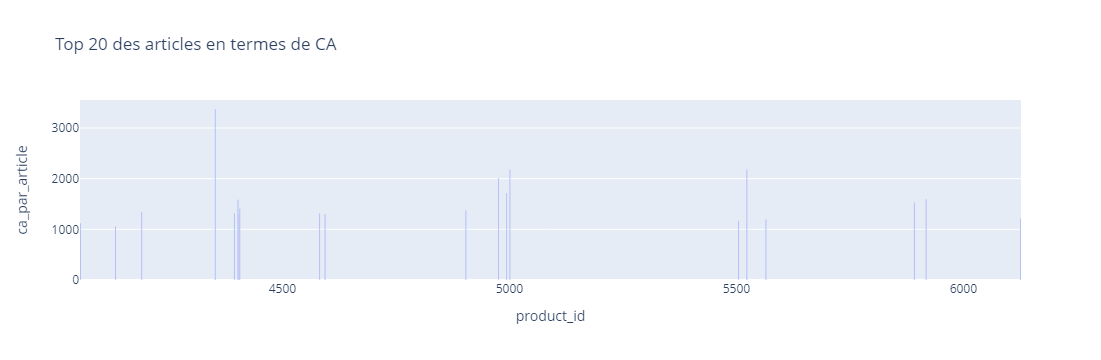

In [199]:
# Créer un graphique en barres des 20 premiers articles avec Plotly Express
fig = px.bar(top_20_articles, x='product_id', y='ca_par_article', title="Top 20 des articles en termes de CA")
fig.show()

In [193]:
# Calculer la somme de la colonne "ca_par_article" pour obtenir le chiffre d'affaires total du site web
chiffre_affaires_total = df_merged['ca_par_article'].sum()

# Afficher le chiffre d'affaires total
print("Chiffre d'affaires total du site web :", chiffre_affaires_total)


#Ce résultat correspond au chiffre d'affaire du site web

Chiffre d'affaires total du site web : 203967.15000000002


In [188]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

# Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merged['part_ca'] = df_merged['ca_par_article'] / df_merged['ca_par_article'].sum()

# Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merged['cumulative_part_ca'] = df_merged['part_ca'].cumsum()

# Trouver le nombre d'articles représentant 80% du CA
articles_80_percent_ca = df_merged[df_merged['cumulative_part_ca'] <= 0.8].shape[0]

# Afficher le nombre d'articles représentant 80% du CA
print("Nombre d'articles représentant 80% du CA :", articles_80_percent_ca)

# Calculer la proportion que représentent ces articles dans le catalogue entier du site web
proportion_articles_80_percent_ca = articles_80_percent_ca / len(df_merged)

# Afficher la proportion
print("Proportion d'articles représentant 80% du CA dans le catalogue entier du site web :", proportion_articles_80_percent_ca)

Nombre d'articles représentant 80% du CA : 348
Proportion d'articles représentant 80% du CA dans le catalogue entier du site web : 0.4218181818181818


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

Les 20 premiers articles en quantité vendue :
    product_id  onsale_web  price  stock_quantity stock_status  \
0         4350           1   79.5             145      instock   
1         4337           1   83.0             145      instock   
2         4334           1   49.0             142      instock   
3         6126           1  135.0             138      instock   
4         5025           1  112.0             136      instock   
5         4353           1   79.5             127      instock   
6         5761           1   19.5             125      instock   
7         4142           1   53.0             125      instock   
8         4348           1   59.0             125      instock   
9         4150           1   59.0             123      instock   
10        4141           1   39.0             123      instock   
11        4867           1    9.9             121      instock   
12        4357           1   39.0             115      instock   
13        4359           1   8

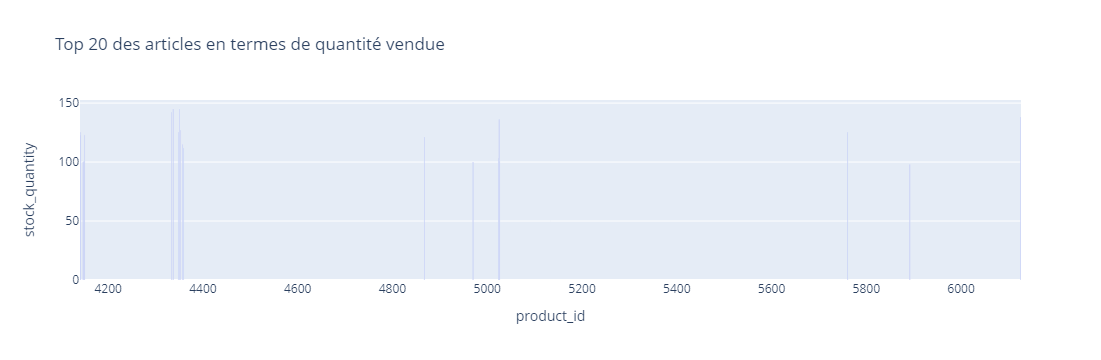

In [215]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
#Réinitialiser l'index du dataset par un reset_index
#Afficher les 20 premier articles en quantité
#Graphique en barre des 20 premiers articles avec plotly express

# Trier le DataFrame dans l'ordre décroissant de quantités vendues
df_merged_sorted_quantity = df_merged.sort_values(by='stock_quantity', ascending=False)

# Réinitialiser l'index du DataFrame
df_merged_sorted_quantity = df_merged_sorted_quantity.reset_index(drop=True)

# Afficher les 20 premiers articles en termes de quantité vendue
top_20_articles_quantity = df_merged_sorted_quantity.head(20)

print("Les 20 premiers articles en quantité vendue :")
print(top_20_articles_quantity)

# Créer un graphique en barres des 20 premiers articles en termes de quantité vendue avec Plotly Express
fig = px.bar(top_20_articles_quantity, x='product_id', y='stock_quantity', title="Top 20 des articles en termes de quantité vendue")
fig.show()

In [216]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

# Trier le DataFrame dans l'ordre décroissant de quantités vendues
df_merged_sorted_quantity = df_merged.sort_values(by='stock_quantity', ascending=False)

# Réinitialiser l'index du DataFrame
df_merged_sorted_quantity = df_merged_sorted_quantity.reset_index(drop=True)

# Créer une colonne calculant la part en quantité de chaque ligne dans le dataset
total_quantity = df_merged_sorted_quantity['stock_quantity'].sum()
df_merged_sorted_quantity['part_quantite'] = df_merged_sorted_quantity['stock_quantity'] / total_quantity

# Créer une colonne réalisant la somme cumulative de la colonne précédemment créée
df_merged_sorted_quantity['cumulative_part_quantite'] = df_merged_sorted_quantity['part_quantite'].cumsum()

# Identifier le nombre d'articles nécessaires pour atteindre 80% des ventes en quantité
articles_80_percent_quantite = df_merged_sorted_quantity[df_merged_sorted_quantity['cumulative_part_quantite'] <= 0.8]

# Calculer la proportion que représentent ces articles dans le catalogue entier du site web
proportion_articles_80_percent_quantite = len(articles_80_percent_quantite) / len(df_merged_sorted_quantity)

# Afficher le résultat
print("Nombre d'articles représentant 80% des ventes en quantité :", len(articles_80_percent_quantite))
print("Proportion que représentent ces articles dans le catalogue entier du site web :", proportion_articles_80_percent_quantite)

Nombre d'articles représentant 80% des ventes en quantité : 378
Proportion que représentent ces articles dans le catalogue entier du site web : 0.4581818181818182


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

C:\Users\jemko\AppData\Local\Temp\ipykernel_2312\473684694.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





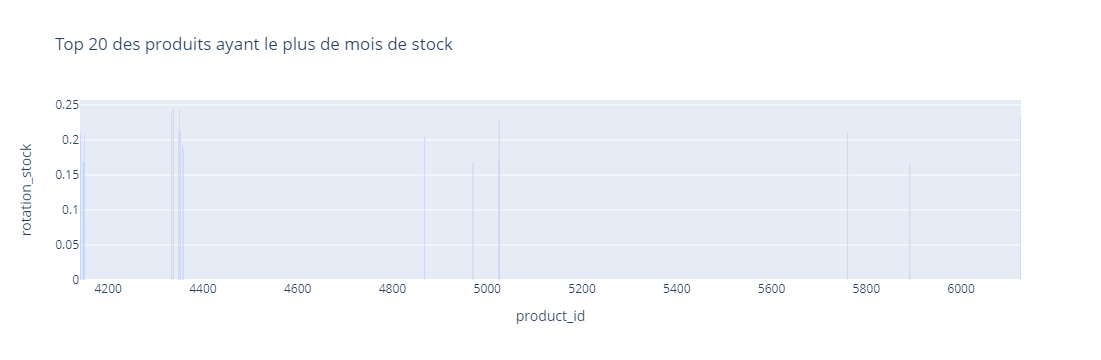

In [217]:
######################################
# Calcule le nombre de mois de stock #
######################################

#Import de numpy 
#Création de la colonne Rotation de stock
#Remplacement des "inf" par 0
#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

import numpy as np

# Création de la colonne Rotation de stock
# Rotation de stock = stock_quantity / (sum(stock_quantity) / (nombre_de_jours_dans_un_mois))
nombre_de_jours_dans_un_mois = 30  # Nombre moyen de jours dans un mois
df_merged['rotation_stock'] = df_merged['stock_quantity'] / (df_merged['stock_quantity'].sum() / nombre_de_jours_dans_un_mois)

# Remplacement des "inf" par 0
df_merged['rotation_stock'].replace(np.inf, 0, inplace=True)

# Trier le DataFrame dans l'ordre décroissant du nombre de mois de stock
df_merged_sorted_rotation = df_merged.sort_values(by='rotation_stock', ascending=False)

# Graphique en barre du top 20 des produits ayant le plus de mois de stock
top_20_rotation_stock = df_merged_sorted_rotation.head(20)
fig = px.bar(top_20_rotation_stock, x='product_id', y='rotation_stock', title="Top 20 des produits ayant le plus de mois de stock")
fig.show()

In [218]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
#Calculer la somme de la colonne "Valorisation_stock_euros"

# Création de la colonne Valorisation des stocks en euros
df_merged['Valorisation_stock_euros'] = df_merged['stock_quantity'] * df_merged['purchase_price']

# Calculer la somme de la colonne "Valorisation_stock_euros"
somme_valorisation_stock_euros = df_merged['Valorisation_stock_euros'].sum()

# Afficher la somme de la colonne "Valorisation_stock_euros"
print("Somme de la colonne 'Valorisation_stock_euros' :", somme_valorisation_stock_euros)


Somme de la colonne 'Valorisation_stock_euros' : 298555.76


In [219]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

# Calculer la somme de la colonne stock quantity
somme_stock_quantity = df_merged['stock_quantity'].sum()

# Afficher la somme de la colonne stock quantity
print("Somme de la colonne 'stock_quantity' :", somme_stock_quantity)

Somme de la colonne 'stock_quantity' : 17811


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [220]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
#Création de la colonne Taux de marge
#Afficher le prix minimum de la colonne "taux_marge"
#Afficher le prix maximum de la colonne "taux_marge"

# Définition du taux de TVA
taux_tva = 0.20

# Création de la colonne prix HT
df_merged['prix_HT'] = df_merged['price'] / (1 + taux_tva)

# Création de la colonne Taux de marge
df_merged['taux_marge'] = ((df_merged['prix_HT'] - df_merged['purchase_price']) / df_merged['prix_HT']) * 100

# Afficher le prix minimum de la colonne "taux_marge"
print("Prix minimum de la colonne 'taux_marge' :", df_merged['taux_marge'].min())

# Afficher le prix maximum de la colonne "taux_marge"
print("Prix maximum de la colonne 'taux_marge' :", df_merged['taux_marge'].max())

Prix minimum de la colonne 'taux_marge' : -634.98814229249
Prix maximum de la colonne 'taux_marge' : 165.1


In [221]:
#affichage de la ligne avec un taux de marge inférieur à 0

# Filtrer les lignes avec un taux de marge inférieur à 0
taux_marge_negatif = df_merged[df_merged['taux_marge'] < 0]

# Afficher les lignes avec un taux de marge inférieur à 0
print("Lignes avec un taux de marge inférieur à 0 :")
print(taux_marge_negatif)

Lignes avec un taux de marge inférieur à 0 :
     product_id  onsale_web  price  stock_quantity stock_status  \
724        6324           0  92.00              18      instock   
817        7196           0  31.00              55      instock   
210        4355           1  12.65              97      instock   
391        4864           0   8.30               0   outofstock   

     purchase_price stock_status_2 id_web   Z_score  ca_par_article   part_ca  \
724           99.00        instock    NaN  2.239148           460.0  0.002255   
817           31.20        instock    NaN -0.044463           403.0  0.001976   
210           77.48        instock  12589 -0.731418            75.9  0.000372   
391            9.99     outofstock  15154 -0.894266            74.7  0.000366   

     cumulative_part_ca  rotation_stock  Valorisation_stock_euros    prix_HT  \
724            0.448661        0.030318                   1782.00  76.666667   
817            0.522604        0.092639              

In [222]:
#création d'un dataframe avec les taux positifs
#Afficher le prix minimum de la colonne "taux_marge"
#Afficher le prix maximum de la colonne "taux_marge"

# Création d'un DataFrame avec les taux de marge positifs
df_taux_marge_positifs = df_merged[df_merged['taux_marge'] >= 0]

# Afficher le prix minimum de la colonne "taux_marge" dans le nouveau DataFrame
prix_min_taux_marge_positifs = df_taux_marge_positifs['taux_marge'].min()
print("Prix minimum de la colonne 'taux_marge' dans les taux positifs :", prix_min_taux_marge_positifs)

# Afficher le prix maximum de la colonne "taux_marge" dans le nouveau DataFrame
prix_max_taux_marge_positifs = df_taux_marge_positifs['taux_marge'].max()
print("Prix maximum de la colonne 'taux_marge' dans les taux positifs :", prix_max_taux_marge_positifs)

Prix minimum de la colonne 'taux_marge' dans les taux positifs : 22.77862595419847
Prix maximum de la colonne 'taux_marge' dans les taux positifs : 165.1


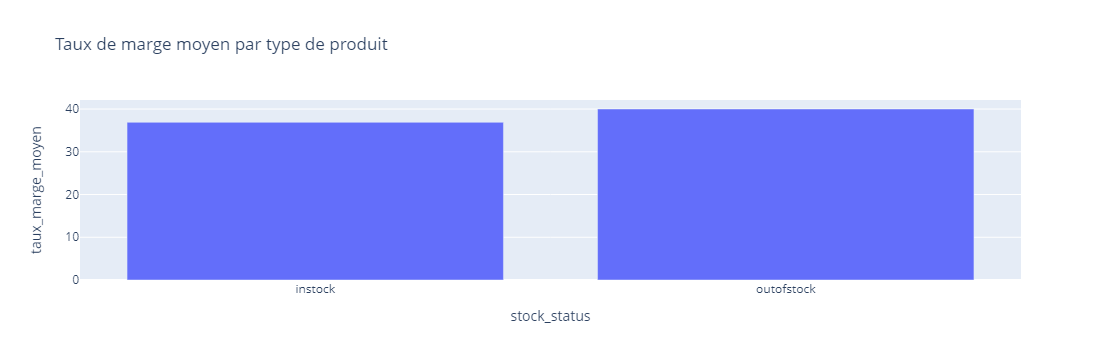

In [223]:
#création d'un dataframe avec le taux de marge moyen par type de produit
#Affichage dans un graphique du taux de marge par type de produit

import plotly.express as px

# Calculer le taux de marge moyen par type de produit
df_taux_marge_par_type = df_merged.groupby('stock_status')['taux_marge'].mean().reset_index()

# Renommer la colonne pour plus de clarté
df_taux_marge_par_type.rename(columns={'taux_marge': 'taux_marge_moyen'}, inplace=True)

# Afficher les données dans un graphique
fig = px.bar(df_taux_marge_par_type, x='stock_status', y='taux_marge_moyen', title="Taux de marge moyen par type de produit")
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

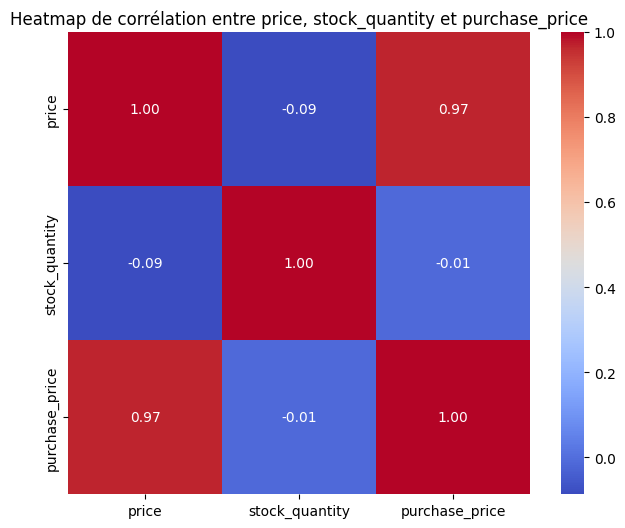

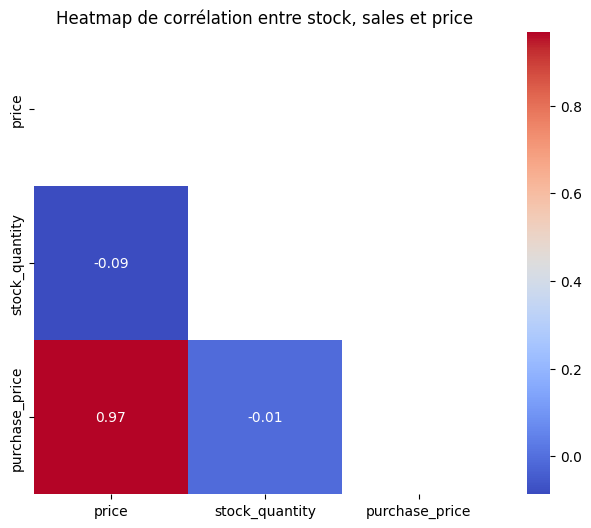

In [145]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
#Création d'un heatmap de correlation avec les variables stock, sales et price
#on peut également créer un mask pour n'afficher qu'une demi heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Création du DataFrame avec les colonnes pertinentes
df_correlation = df_merged[['price', 'stock_quantity', 'purchase_price']]

# Calcul de la matrice de corrélation
corr_matrix = df_correlation.corr()

# Création d'un heatmap de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap de corrélation entre price, stock_quantity et purchase_price')
plt.show()

# Création d'un masque pour la moitié supérieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Création d'un heatmap de corrélation avec masque
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, mask=mask)
plt.title('Heatmap de corrélation entre stock, sales et price')
plt.show()

In [146]:
#Que peut-on conclure des correlations ?

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [147]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  

# Spécifiez le chemin de sortie du fichier Excel
##chemin_fichier_excel = "chemin/vers/votre/fichier/nom_du_fichier.xlsx"

# Exporter le DataFrame vers un fichier Excel
##df_merged.to_excel(chemin_fichier_excel, index=False)

##print("Le DataFrame a été exporté avec succès vers le fichier Excel :", chemin_fichier_excel)
